# Importance sampling

Consider a function $f(x) \; \forall x \in [0,1]$ that we are trying to integrate using the Monte Carlo method. If $f(x)$ is sharply peaked and we use a uniform random number generator, then a large number of numbers would not contribute to the evaluation (and hence a waste of time). Therefore, the process would be inefficient.

However, we can do this trick of converting the integrand to a smooth one by changing the variables. For example, consider

$$I = \int_0^1\, dx\, f(x)$$

Then we have
$$I = \int_0^1\, dx\, f(x) = \int_0^1\, dx\,w(x)\frac{f(x)}{w(x)}$$
where, $w(x)$ is a normalized function, *i.e.*, $\displaystyle \int_0^1\, dx\, w(x) = 1$


Let, 
$\displaystyle y(x) = \int_0^x\, dz\, w(z)\;$ such that, $\;\displaystyle \frac{dy}{dx} = w(x)$ and $x = 0 \rightarrow y = 0$ and $x = 1 \rightarrow y = 1$

So, finally,
$$I = \int_0^1\, dx\, f(x) = \int_0^1\, dx\,w(x)\frac{f(x)}{w(x)} = \int_0^1\, dy\,\frac{f(x(y))}{w(x(y))}$$

So, by finding a suitable $w(x)$, we can have $f/w$ as a smooth function, and this will require only a small number of points to evaluate the function. So the difficult part is to find a proper $w(x)$ and a invertible relation $x(y)$.

### Example

Let $\displaystyle f(x) = \frac{1}{(1+x^2)}$ and $\displaystyle \int_0^1\, f(x)\, dx = \frac{\pi}{4} = 0.7853981633974$ 

We choose $\displaystyle w(x) = \frac{1}{3}(4 - 2x)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 1/(1+x**2)

def w(x):
    return (4-2*x)/3

def get_x(y): 
    return 2 - np.sqrt(4-3*y)

def g(x):
    return 3/(4-2*x)/(1+x**2)

def MC_eval_f(n):
    store = 0.0
    for i in range(n):
        x = np.random.rand()
        store += f(x)
    return store/n

def MC_eval_g(n):
    store = 0.0
    for i in range(n):
        y = np.random.rand()
        store += g(get_x(y))
    return store/n

In [7]:
Ns = np.concatenate((np.asarray([1,2,5])*10, np.asarray([1,2,5])*100))

np.random.seed(20)

for n in Ns:
    value = MC_eval_f(n)
    value2 = MC_eval_g(n)
    print('%5d %10.7f %10.7f %10.7f %10.7f'%(n, value, abs(np.pi/4-value), value2, abs(np.pi/4-value2)))


   10  0.7453715  0.0400267  0.7811251  0.0042730
   20  0.7743793  0.0110189  0.7928527  0.0074546
   50  0.7911677  0.0057695  0.7824337  0.0029645
  100  0.7477031  0.0376951  0.7835404  0.0018577
  200  0.7900946  0.0046965  0.7843642  0.0010340
  500  0.8002406  0.0148424  0.7855429  0.0001447


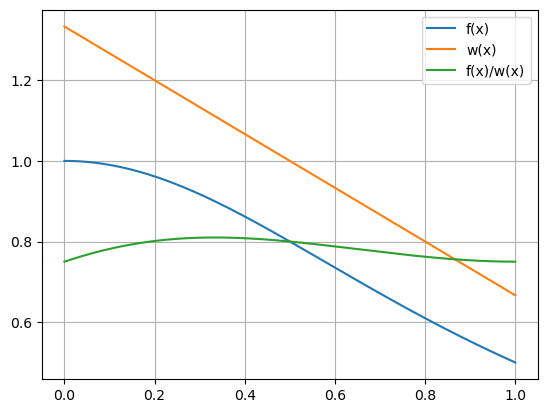

In [10]:
xs = np.linspace(0.0, 1.0, 200)
ys = f(xs)
plt.plot(xs, ys, label='f(x)')
ys = w(xs)
plt.plot(xs, ys, label='w(x)')
ys = g(xs)
plt.plot(xs, ys, label='f(x)/w(x)')
plt.grid()
plt.legend()

## Metropolis algorithm

### Generating random numbers having a specific distribution

Consider we decided to have a random walk such that we stay close to the ***peak.***

The algorithm to achieve that is given by Metropolis and others. 

Let $w(x)$ be the desired distribution. The algorithm is:
1. Start from $x_o$.
2. Take a random step $\delta x$ to get $x_1 = x_o + \delta x$
3. Calculate $r = w(x_1)/w(x_o)$
4. If $r > 1,$ then accept the step (so, update $x_o$ by $x_1$)
5. Otherwise, accept the step with a probability $r$ (generate a random number $p$, if $p \le r$ accept the step, else reject it).

### Example

We choose $\displaystyle w(x) = \frac{x^3}{e^x - 1}.$

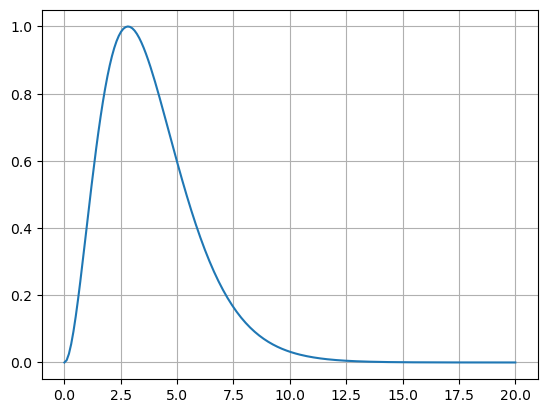

In [9]:
def w(x):
    if x>0:
        return x**3/(np.exp(x)-1)
    else:
        return 0.0

xs = np.linspace(0.0, 20.0, num=200)
ys = [w(x) for x in xs]

ys = ys/np.max(ys)
plt.plot(xs, ys);
plt.grid()

In [14]:
# Simulate

x0 = 2.5
N = 1000000
stepsize = 1.0

store = np.zeros(N)
for i in range(N):
    store[i] = x0
    x1 = x0 + stepsize*(np.random.rand()-0.5)
    r = w(x1)/w(x0)
    if r>1:
        x0 = x1
    else:
        p = np.random.rand()
        if p <= r:
            x0 = x1



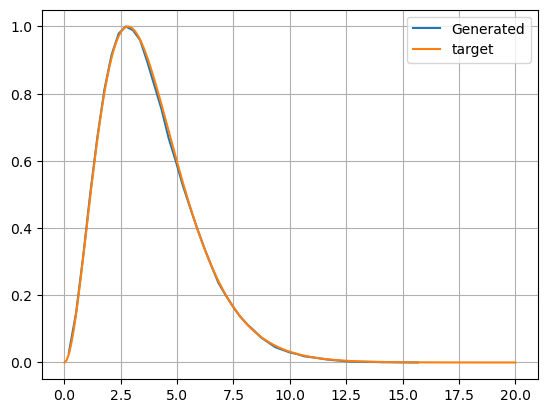

In [16]:
values, edges = np.histogram(store,50)
midpoints = [(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)]

values = values/np.max(values)
plt.plot(midpoints, values,label='Generated')
plt.plot(xs, ys,label='target')
plt.grid()
plt.legend()